## Clustering and dimensionality reduction

The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded:

whether the wine is red or white
the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.
Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

To clarify: I'm not asking you to run a supervised learning algorithms. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.

### Methodology:
Firstly, we are loading the dataset, and normalizing the features, and then checking various Unsupervised learning techniques like PCA, tSNE, and then use pca run the kmeans on the data.

To start with the problem, we performed following steps:

1.Importred the necessary libraries

2.Loaded the dataset in a dataframe called “wine”

3.As we are going to perform the unsupervised learning algorithm, dataset should be unlabeled. Hence, we removed the last
two columns from the dataset, which were dependant varibales.

4.Scaled the numeric data to mean = 0 and s.d = 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
wine = pd.read_csv("wine.csv")

In [5]:
wine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [6]:
wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [7]:
wine.shape

(6497, 13)

In [8]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [9]:
features = wine.columns[:11]

In [10]:
features 

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [11]:
# Normalizing the features to make the mean = 0 and std. dev as 1
x =wine.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [12]:
x.shape

(6497, 11)

In [13]:
#Checking mean & SD
np.mean(x),np.std(x)

(-6.760729571926457e-17, 1.0)

In [14]:
features = wine.columns
normalised_wine = pd.DataFrame(x)
normalised_wine

0         1         2         3         4         5         6   \
0     0.142473  2.188833 -2.192833 -0.744778  0.569958 -1.100140 -1.446359   
1     0.451036  3.282235 -2.192833 -0.597640  1.197975 -0.311320 -0.862469   
2     0.451036  2.553300 -1.917553 -0.660699  1.026697 -0.874763 -1.092486   
3     3.073817 -0.362438  1.661085 -0.744778  0.541412 -0.762074 -0.986324   
4     0.142473  2.188833 -2.192833 -0.744778  0.569958 -1.100140 -1.446359   
...        ...       ...       ...       ...       ...       ...       ...   
6492 -0.783214 -0.787650 -0.197054 -0.807837 -0.486252 -0.367664 -0.420128   
6493 -0.474652 -0.119460  0.284686  0.537425 -0.257883  1.491697  0.924588   
6494 -0.551792 -0.605417 -0.885253 -0.891916 -0.429160 -0.029599 -0.083949   
6495 -1.323198 -0.301694 -0.128234 -0.912936 -0.971538 -0.593041 -0.101642   
6496 -0.937495 -0.787650  0.422326 -0.975995 -1.028631 -0.480353 -0.313966   

            7         8         9         10  
0     1.034993  1.813090  0.193097 -0.915464  
1     0.701486 -0.115073  0.999579 -0.580068  
2     0.768188  0.258120  0.797958 -0.580068  
3     1.101694 -0.363868  0.327510 -0.580068  
4     1.034993  1.813090  0.193097 -0.915464  
...        ...       ...       ...       ...  
6492 -1.186161  0.320319 -0.210144  0.593818  
6493  0.067824 -0.426067 -0.478971 -0.747766  
6494 -0.719251 -1.421248 -0.478971 -0.915464  
6495 -2.003251  0.755710 -1.016626  1.935402  
6496 -1.763127  0.258120 -1.419867  1.096912  

[6497 rows x 11 columns]

## PCA

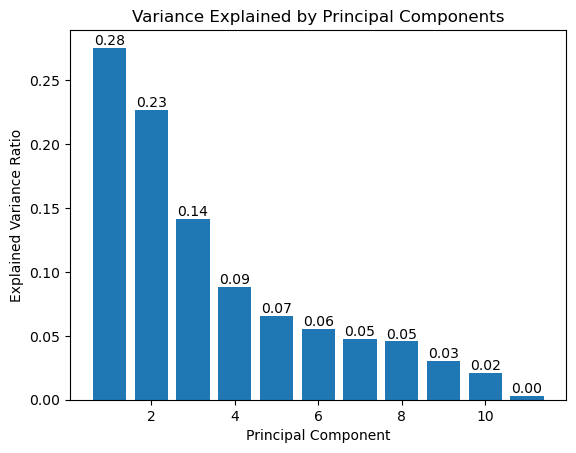

Explained Variance Ratios: [0.2754426  0.22671146 0.14148609 0.08823201 0.06544317 0.05521016
 0.04755989 0.04559184 0.03063855 0.02069961 0.00298462]


In [15]:
# PCA
pca_wine = PCA()
PCAwine = pca_wine.fit_transform(x)

# Variance plot
explained_variance = pca_wine.explained_variance_ratio_
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Principal Components')

# Add annotations to the plot
for i, ratio in enumerate(explained_variance):
    plt.text(i + 1, ratio, f'{ratio:.2f}', ha='center', va='bottom')

plt.show()

# Summary
print("Explained Variance Ratios:", explained_variance)

PCA is not able to find a strong variance on our base data, with PCA1 only being able to explain 0.28 whereas PCA2 being able to explain 0.23 variance of the data.

In [16]:
principal_PCAwine = pd.DataFrame(data = PCAwine,columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10', 'PC11'])

In [17]:
principal_PCAwine

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -3.205996  0.416523 -2.722237 -0.796778  0.202877 -0.227363 -0.325554   
1    -3.039051  1.107462 -2.046952 -0.770225 -1.322655  1.655121  0.059559   
2    -3.071893  0.878964 -1.742580 -0.802257 -0.762112  0.848374  0.167670   
3    -1.571262  2.112545  2.592917 -0.292785  0.604701 -0.713308 -0.851217   
4    -3.205996  0.416523 -2.722237 -0.796778  0.202877 -0.227363 -0.325554   
...        ...       ...       ...       ...       ...       ...       ...   
6492 -0.062824 -1.934205  0.223912  0.189443  0.000146 -0.629250  0.367168   
6493  1.866989  0.524431 -0.431798  0.183000 -0.518028  0.188672 -0.372130   
6494  0.571133 -0.722662  0.091469 -0.939670 -1.262008 -0.553014  1.047896   
6495  0.090052 -3.545780  0.141195 -0.055725  0.208807 -0.148921 -0.380177   
6496  0.512576 -2.891040  0.739417 -0.449185  0.080561 -0.845156 -0.452858   

           PC8       PC9      PC10      PC11  
0    -0.567278  0.071229 -0.108046  0.027460  
1    -0.514603 -0.429129 -0.268149 -0.015471  
2    -0.420952 -0.271032 -0.086832  0.054146  
3    -0.929669  0.549410  0.116660 -0.103745  
4    -0.567278  0.071229 -0.108046  0.027460  
...        ...       ...       ...       ...  
6492 -0.048457  0.070114 -0.102160 -0.012106  
6493 -0.236534 -0.122212 -0.479837 -0.080560  
6494 -1.068127 -0.133957 -0.356173  0.158103  
6495  0.638527 -0.255940  0.266327  0.054196  
6496  0.263393 -0.181712 -0.120059  0.008531  

[6497 rows x 11 columns]

In [18]:
# Create a DataFrame for loadings summary
loadings_summary = pd.DataFrame(data=pca_wine.components_.T, columns=[f'PC{i+1}' for i in range(len(pca_wine.components_))], index=wine.columns[:11])

# Print loadings summary
print(loadings_summary)


                           PC1       PC2       PC3       PC4       PC5  \
fixed.acidity        -0.238799  0.336355  0.434301 -0.164346  0.147480   
volatile.acidity     -0.380757  0.117550 -0.307259 -0.212785 -0.151456   
citric.acid           0.152388  0.183299  0.590570  0.264300  0.155349   
residual.sugar        0.345920  0.329914 -0.164688 -0.167443  0.353362   
chlorides            -0.290113  0.315258 -0.016679  0.244744 -0.614391   
free.sulfur.dioxide   0.430914  0.071933 -0.134224  0.357279 -0.223532   
total.sulfur.dioxide  0.487418  0.087266 -0.107462  0.208420 -0.158134   
density              -0.044937  0.584037 -0.175606 -0.072725  0.306561   
pH                   -0.218686 -0.155869 -0.455324  0.414551  0.453376   
sulphates            -0.294135  0.191716  0.070042  0.640536  0.136577   
alcohol              -0.106437 -0.465058  0.261101  0.106803  0.188892   

                           PC6       PC7       PC8       PC9      PC10  \
fixed.acidity         0.204554 -0.283

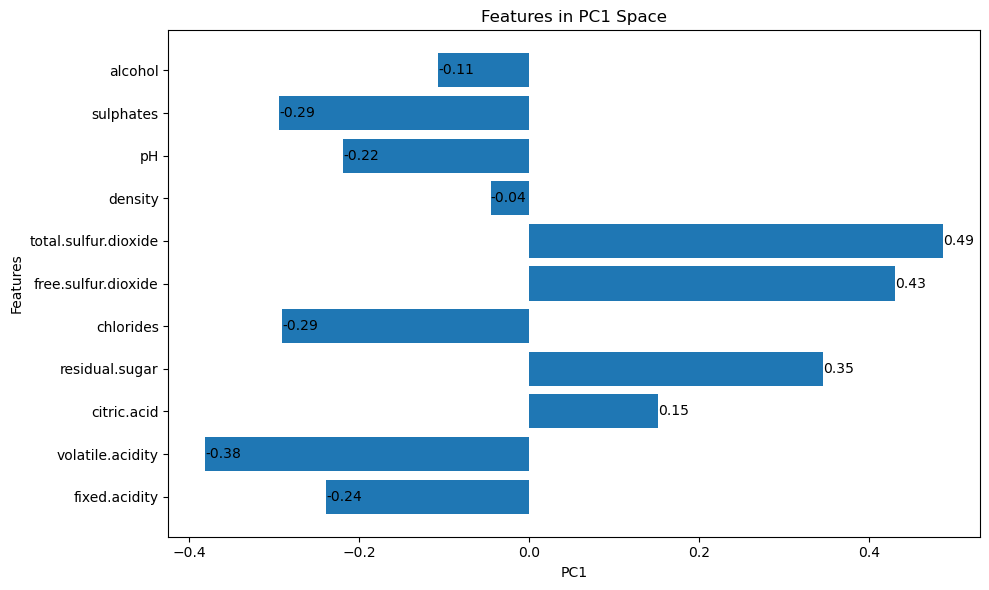

In [19]:
# Plotting in PC1 space
plt.figure(figsize=(10, 6))
plt.barh(loadings_summary.index, loadings_summary['PC1'])
plt.xlabel('PC1')
plt.ylabel('Features')
plt.title('Features in PC1 Space')
plt.tight_layout()
# Add annotations to the plot
for i, value in enumerate(loadings_summary['PC1']):
    plt.text(value, i, f'{value:.2f}', va='center')

plt.show()

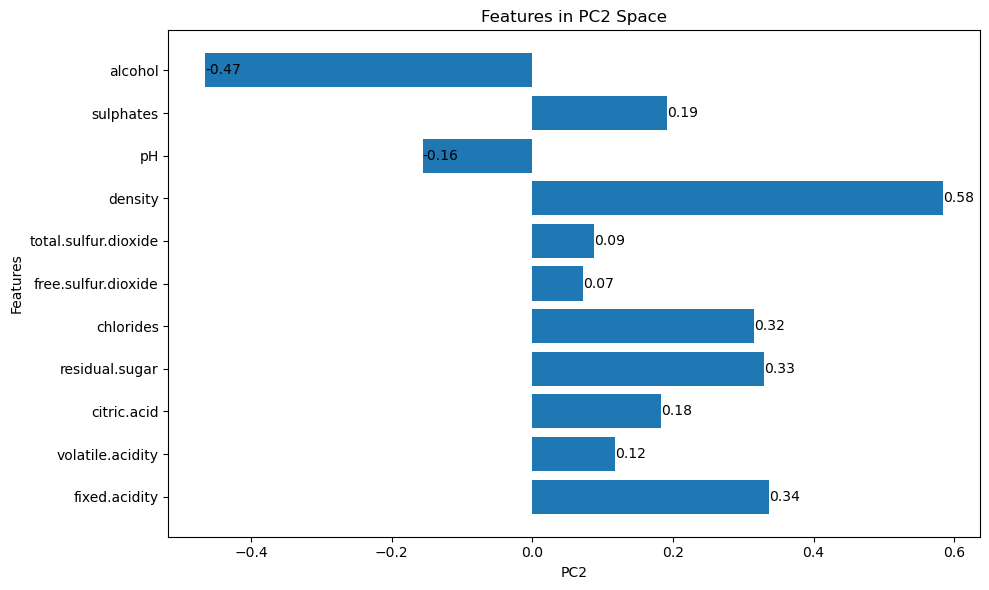

In [20]:
# Plotting in PC2 space
plt.figure(figsize=(10, 6))
plt.barh(loadings_summary.index, loadings_summary['PC2'])
plt.xlabel('PC2')
plt.ylabel('Features')
plt.title('Features in PC2 Space')
plt.tight_layout()
# Add annotations to the plot
for i, value in enumerate(loadings_summary['PC2']):
    plt.text(value, i, f'{value:.2f}', va='center')

plt.show()

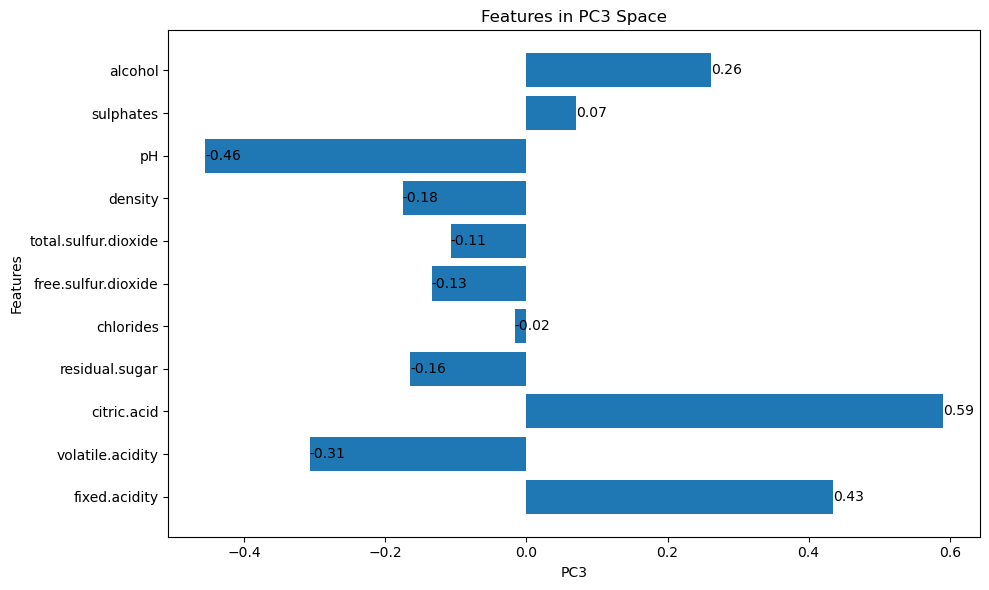

In [21]:
# Plotting in PC3 space
plt.figure(figsize=(10, 6))
plt.barh(loadings_summary.index, loadings_summary['PC3'])
plt.xlabel('PC3')
plt.ylabel('Features')
plt.title('Features in PC3 Space')
plt.tight_layout()
# Add annotations to the plot
for i, value in enumerate(loadings_summary['PC3']):
    plt.text(value, i, f'{value:.2f}', va='center')

plt.show()

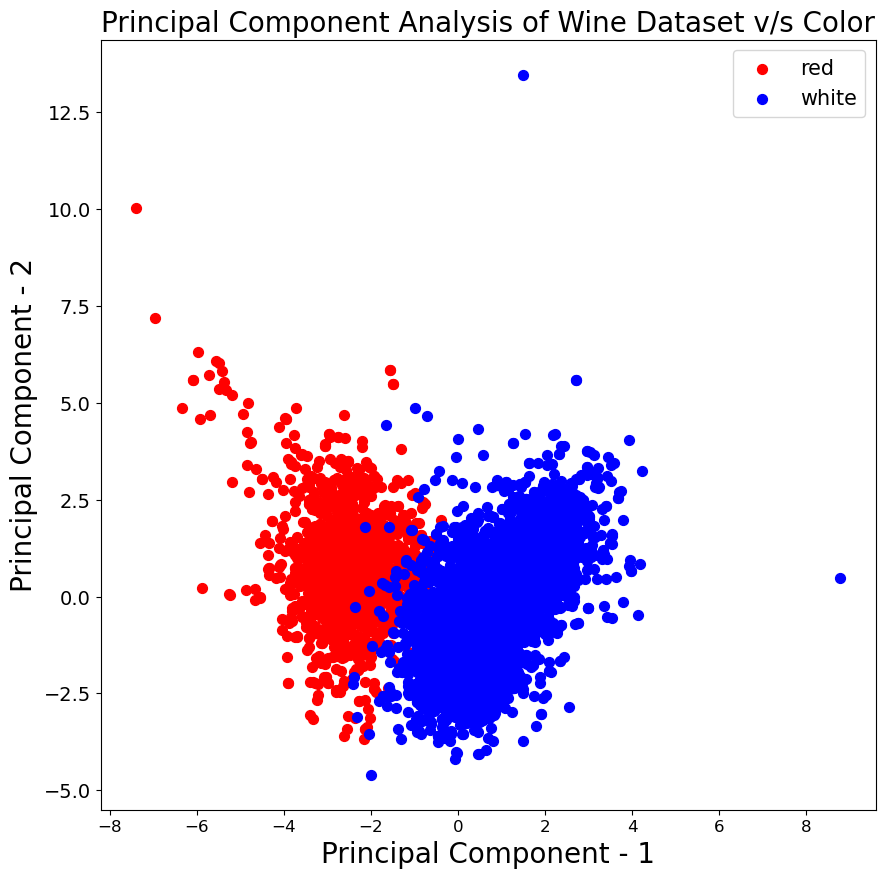

In [22]:
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset v/s Color", fontsize=20)

# Assuming you have performed PCA on the wine dataset and have pca_df with PCA results
targets = ['red', 'white']
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = (wine['color'] == target)
    plt.scatter(principal_PCAwine.loc[indicesToKeep, 'PC1'], principal_PCAwine.loc[indicesToKeep, 'PC2'], c=color, s=50)

plt.legend(targets, prop={'size': 15})
plt.show()

From the above graph, it becomes evident that there exist two distinct groupings, with a slight degree of overlap, within the space defined by the first two principal components. This suggests that these two principal components effectively capture the differentiation between wine types, albeit with a minor level of misclassification.

Now, let's check the Quality

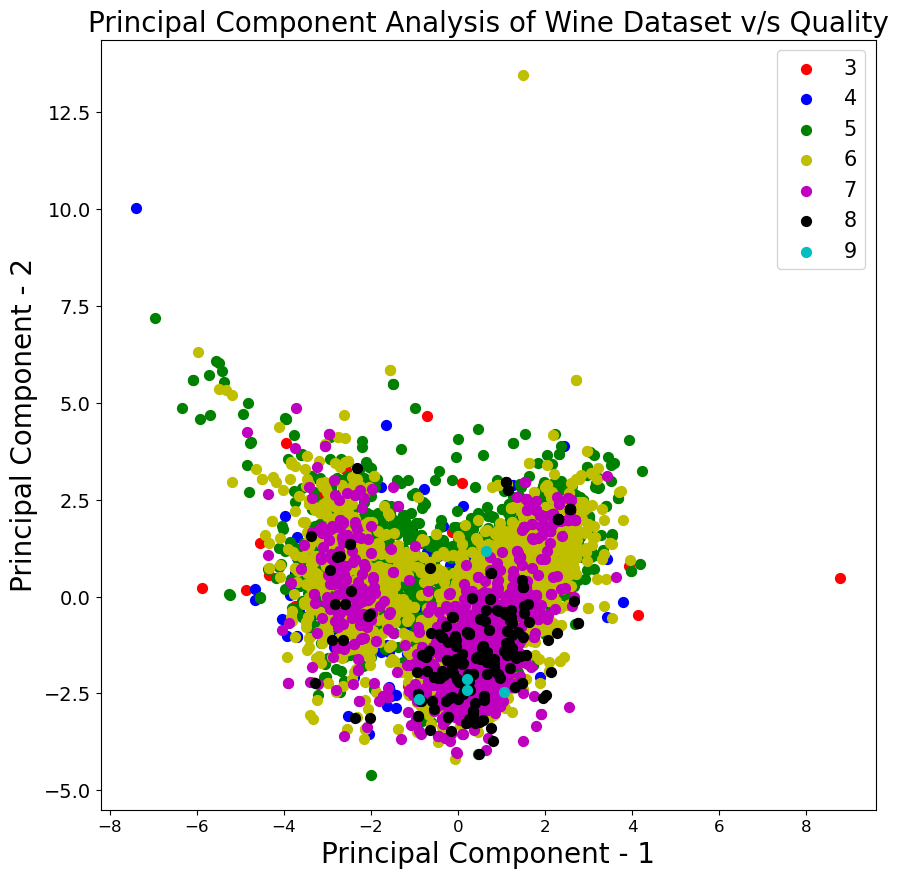

In [23]:
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset v/s Quality", fontsize=20)

# Assuming you have performed PCA on the wine dataset and have pca_df with PCA results
targets1 = [3,4,5,6,7,8,9]
colors1 = ['r','b','g','y','m','k','c']

for target, color in zip(targets1, colors1):
    indicesToKeep = (wine['quality'] == target)
    plt.scatter(principal_PCAwine.loc[indicesToKeep, 'PC1'], principal_PCAwine.loc[indicesToKeep, 'PC2'], c=color, s=50)

plt.legend(targets1, prop={'size': 15})
plt.show()

For Quality, PCA is a bit cluttered and closeby, so we can say that PCA is not able to distinguish the high quality wine from the low quality wine.

## t-SNE

In [24]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px  # for interative visualizations

In [26]:
wine = pd.read_csv("wine.csv")

In [27]:
features = wine.columns[:11]

# Normalising the features
x =wine.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [28]:
features = wine.columns
normalised_wine = pd.DataFrame(x)
normalised_wine

0         1         2         3         4         5         6   \
0     0.142473  2.188833 -2.192833 -0.744778  0.569958 -1.100140 -1.446359   
1     0.451036  3.282235 -2.192833 -0.597640  1.197975 -0.311320 -0.862469   
2     0.451036  2.553300 -1.917553 -0.660699  1.026697 -0.874763 -1.092486   
3     3.073817 -0.362438  1.661085 -0.744778  0.541412 -0.762074 -0.986324   
4     0.142473  2.188833 -2.192833 -0.744778  0.569958 -1.100140 -1.446359   
...        ...       ...       ...       ...       ...       ...       ...   
6492 -0.783214 -0.787650 -0.197054 -0.807837 -0.486252 -0.367664 -0.420128   
6493 -0.474652 -0.119460  0.284686  0.537425 -0.257883  1.491697  0.924588   
6494 -0.551792 -0.605417 -0.885253 -0.891916 -0.429160 -0.029599 -0.083949   
6495 -1.323198 -0.301694 -0.128234 -0.912936 -0.971538 -0.593041 -0.101642   
6496 -0.937495 -0.787650  0.422326 -0.975995 -1.028631 -0.480353 -0.313966   

            7         8         9         10  
0     1.034993  1.813090  0.193097 -0.915464  
1     0.701486 -0.115073  0.999579 -0.580068  
2     0.768188  0.258120  0.797958 -0.580068  
3     1.101694 -0.363868  0.327510 -0.580068  
4     1.034993  1.813090  0.193097 -0.915464  
...        ...       ...       ...       ...  
6492 -1.186161  0.320319 -0.210144  0.593818  
6493  0.067824 -0.426067 -0.478971 -0.747766  
6494 -0.719251 -1.421248 -0.478971 -0.915464  
6495 -2.003251  0.755710 -1.016626  1.935402  
6496 -1.763127  0.258120 -1.419867  1.096912  

[6497 rows x 11 columns]

In [29]:
# specify the hyperparameters. For example, we can start with a perplexity of 30 
# and a learning rate (also called epsilon) of 200. These are common starting values for tSNE.
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)

# run t-SNE on the standardized data
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.024s...
[t-SNE] Computed neighbors for 6497 samples in 2.309s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.697145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.147186
[t-SNE] KL divergence after 1000 iterations: 1.409055


In [30]:
# Assuming you have performed t-SNE and have tsne_results and wine DataFrame
tsne_df = pd.DataFrame(data=tsne_results, columns=['Dim1', 'Dim2'])
tsne_df['color'] = wine['color'].values

# Define custom colors for red and white wines
color_discrete_map = {'red': 'red', 'white': 'blue'}

# Create an interactive plot with different colors for red and white wines
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='color', hover_data=['color'],color_discrete_map=color_discrete_map)
fig.show()


tSNE data seems to over-estimate the white wine than the red. We can see a clear distinction with a few misclassifications in both

In [31]:


# Assuming you have performed t-SNE and have tsne_results and wine DataFrame
tsne_df = pd.DataFrame(data=tsne_results, columns=['Dim1', 'Dim2'])
tsne_df['quality'] = wine['quality'].values


# Create an interactive plot with different colors for red and white wines
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='quality', hover_data=['quality'])
fig.show()


tSNE also is not able to segregate the quality.

## K-means with PCA 

In [32]:
from sklearn.cluster import KMeans
import seaborn as sns

In [35]:
# Load the dataset
wine_data = pd.read_csv("wine.csv")

# Separate features and target variable
X = wine_data.drop(['color','quality'], axis=1)

# Center and scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# PCA with just two components
pca = PCA(n_components=2)
pca1 = pca.fit_transform(X_scaled)

# Save components to a DataFrame
PCA_components = pd.DataFrame(pca1)

In [37]:
PCA_components

0         1
0    -3.205996  0.416523
1    -3.039051  1.107462
2    -3.071893  0.878964
3    -1.571262  2.112545
4    -3.205996  0.416523
...        ...       ...
6492 -0.062824 -1.934205
6493  1.866989  0.524431
6494  0.571133 -0.722662
6495  0.090052 -3.545780
6496  0.512576 -2.891040

[6497 rows x 2 columns]

<Axes: xlabel='0', ylabel='1'>

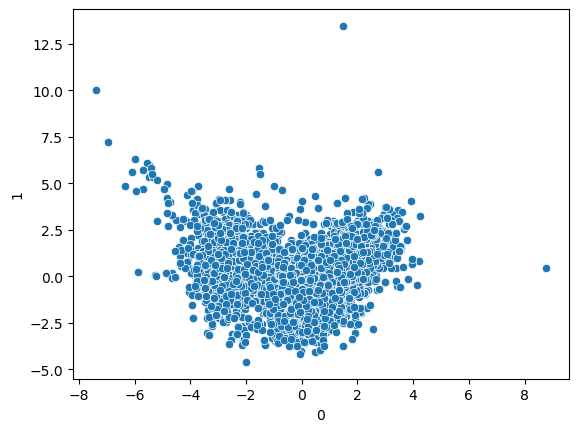

In [38]:
pc1_values = PCA_components[0]
pc2_values = PCA_components[1]
sns.scatterplot(x=pc1_values, y=pc2_values)

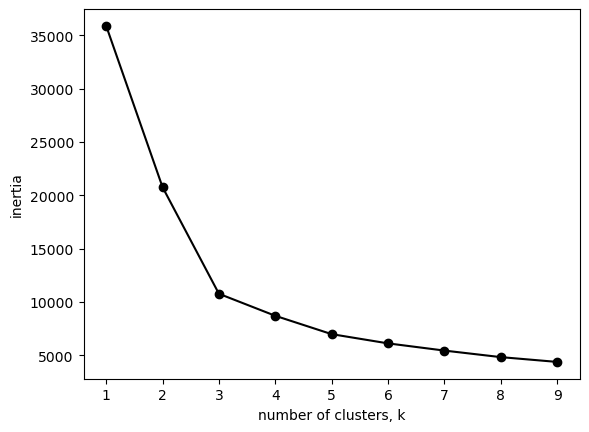

In [39]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [40]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertias, curve="convex", direction="decreasing")

In [41]:
kl.elbow

3

We found k=3 to be the best for the kmeans clustering from the elbow plot.

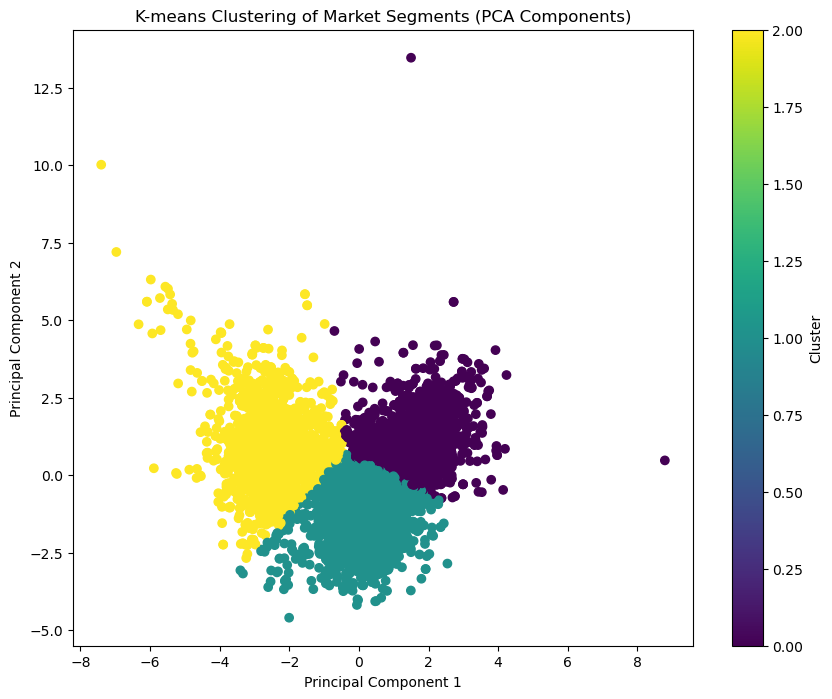

In [42]:
# Apply K-means clustering on PCA components
kmeans = KMeans(n_clusters=3, random_state=42)
wine_data['cluster'] = kmeans.fit_predict(pca1)

# Visualize the clusters using PCA components
plt.figure(figsize=(10, 8))
plt.scatter(pca1[:, 0], pca1[:, 1], c=wine_data['cluster'], cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering of Market Segments (PCA Components)")
plt.colorbar(label='Cluster')
plt.show()

In [43]:
# Count the number of wines of each color within each cluster
cluster_color_counts = wine_data.groupby(['cluster', 'color']).size().unstack(fill_value=0)
cluster_color_counts

color     red  white
cluster             
0           5   1928
1          73   2907
2        1521     63

Cluster 0 predominantly has white wine, Cluster 1 has a more balanced preference with a slight inclination towards white, and Cluster 2 mostly has red wine. 

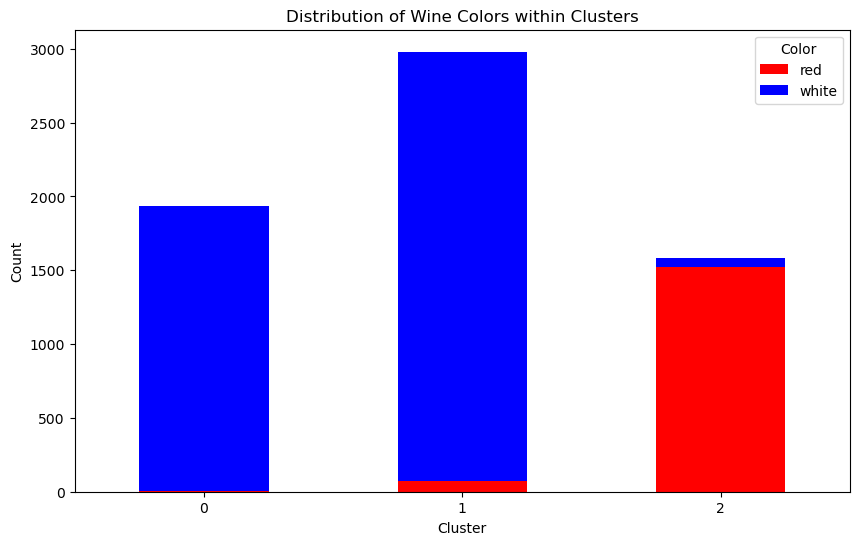

In [44]:
# Create a custom colormap for wine colors
wine = ['red', 'white']
wine_colors = ['red', 'blue']
wine_cmap = ListedColormap(wine_colors)

# Plot a stacked bar plot with the custom colormap
ax = cluster_color_counts.plot(kind='bar', stacked=True, colormap=wine_cmap, figsize=(10, 6))
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Wine Colors within Clusters")
plt.legend(title='Color', labels=wine)
plt.xticks(rotation=0)
plt.show()

In [45]:
# Count the number of wines of each quality within each cluster
cluster_color_counts_1 = wine_data.groupby(['cluster', 'quality']).size().unstack(fill_value=0)
cluster_color_counts_1

quality   3    4    5     6    7    8  9
cluster                                 
0        12   41  826   861  164   28  1
1         8  106  621  1359  733  149  4
2        10   69  691   616  182   16  0

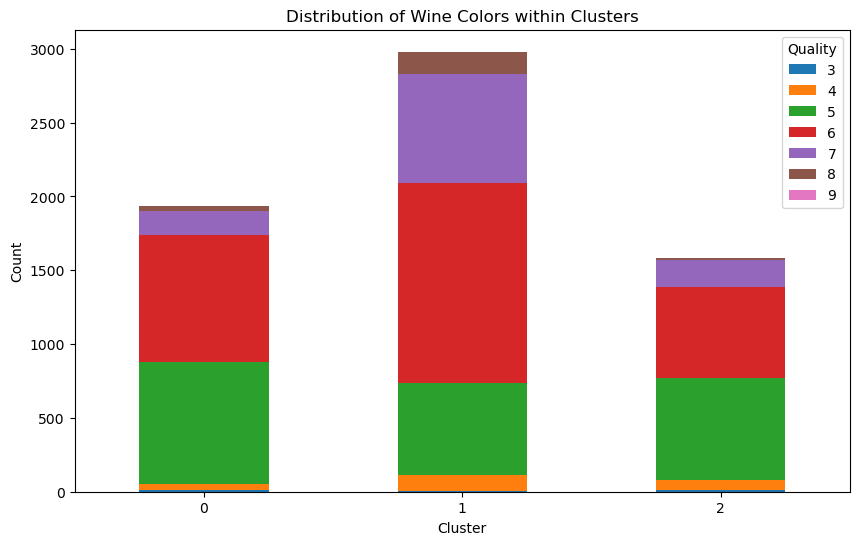

In [46]:
# Plot a stacked bar plot for quality
ax = cluster_color_counts_1.plot(kind='bar', stacked=True,figsize=(10, 6))
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Wine Colors within Clusters")
plt.legend(title='Quality')
plt.xticks(rotation=0)
plt.show()

In quality we cannot see any such segregation even with Kmeans and PCA

Finally we can draw following conclusions:

1.All the three methods K-Means clustering, TSNE and PCA are capable of distinguishing the red wines from the white wines.

2.All the methods are not capable of distinguishing the higher quality wines from the lower quality wines. 

3.PCA and TSNE were capable of ditinguishing for color - we wanted to check if Kmeans on PCA can give us better results for quality which does not seem to be the case.